# Image Classification using LENET CNN

## MNIST Dataset - Handwritten digits(0-9)

In [1]:
#import tensorflow module
import tensorflow as tf
import numpy as np

print(tf.__version__)


2.15.0


## Load the data

In [2]:
#Grab the MNIST dataset
print("Downloading MNIST")
(trainData,trainLabels),(testData,testLabels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## Prepare the data

In [3]:
#parameters for MNIST dataset
num_classes = 10
image_width = 28
image_height = 28
image_channels = 1

In [4]:
# shape the input data using "channels last" ordering
# num_samples x rows x columns x depth
trainData = trainData.reshape((trainData.shape[0], image_height, image_width, image_channels))
testData = testData.reshape((testData.shape[0], image_height, image_width, image_channels))


In [5]:
#Scale data to the range of [0,1]
trainData = trainData.astype("float32")/255.0
testData = testData.astype("float32")/255.0

In [6]:
#Pad the data to 32x32 for use in LENET5 network
trainData = np.pad(trainData,((0,0),(2,2),(2,2),(0,0)),'constant')
testData = np.pad(testData,((0,0),(2,2),(2,2),(0,0)),'constant')

In [7]:
#display data dimensions
print("TrainData: ", trainData.shape)
print("TrainLabels: ", trainLabels.shape)
print("TestData: ", testData.shape)
print("TestLabels: ", testLabels.shape)

TrainData:  (60000, 32, 32, 1)
TrainLabels:  (60000,)
TestData:  (10000, 32, 32, 1)
TestLabels:  (10000,)


In [8]:
#parameters for training dataset
num_classes = 10
image_width = 32
image_height = 32
image_channels = 1

![image-2.png](attachment:image-2.png)

In [9]:
# Import the necessary packages
from tensorflow.keras import backend
from tensorflow.keras import models
from tensorflow.keras import layers

#define the model as a class
class LeNet:
    # Input => CONV => tanh => avg-pool => CONV => tanh => avg-pool => FC => tanh => FC => tanh => FC => SMAX
    @staticmethod
    def init(numChannels,imgRows,imgCols, numClasses,weightsPath = None):
        if backend.image_data_format() == "channels_first":
            inputShape = (numChannels,imgRows,imgCols)
        else:
            inputShape = (imgRows,imgCols,numChannels)

        # Initialize the model
        model = models.Sequential()

        #define the first set of conv => activation => pool layers
        model.add(layers.Conv2D(filters = 6, kernel_size=(5,5),strides = (1,1), padding = "valid", activation = tf.nn.tanh, input_shape = inputShape))
        model.add(layers.AveragePooling2D(pool_size=(2,2),strides = (2,2)))

        #define the second set of conv => activation => pool layers
        model.add(layers.Conv2D(filters = 16, kernel_size=(5,5),strides = (1,1), padding = "valid", activation = tf.nn.tanh, input_shape = inputShape))
        model.add(layers.AveragePooling2D(pool_size=(2,2),strides = (2,2)))

        # flatten the convolution volume to fully connected layers
        model.add(layers.Flatten())

        # Define the first FC => ACTIVATION layer
        model.add(layers.Dense(units = 120,activation = tf.nn.tanh))

        # Define the second FC => ACTIVATION layer
        model.add(layers.Dense(units = 84,activation = tf.nn.tanh))

        #lastly, define the soft-max classifier
        model.add(layers.Dense(units = numClasses, activation = tf.nn.softmax))

        # If a weighted path is supplied indicating that the model was pre-trained, then load the weights
        if weightsPath is not None:
            model.load_weights(weightsPath)

        return model

## Compile Model

In [10]:
# Initialize the model
model = LeNet.init(numChannels=image_channels,
                  imgRows = image_height,
                  imgCols = image_width,
                  numClasses = num_classes,
                  weightsPath = None)

#Compile Model

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

## Train Model

In [11]:
# define callback function for training termination criteria
# accuracy cutoff = 0.99

class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs = None):
        if(logs.get("accuracy")>0.99):
            print("\nReached 99% accuracy and so stopped training")
            self.model.stop_training = True

#initialize training criteria
batch_size = 128
epochs = 100

#run training
print("[INFO] Training..")
history = model.fit(x=trainData,y=trainLabels, validation_data = (testData,testLabels),
                   batch_size=batch_size, epochs=epochs, verbose = 1, callbacks = [myCallBack()])

# There is onl

[INFO] Training..
Epoch 1/100
469/469 [==============================] - 33s 70ms/step - loss: 1.1285 - accuracy: 0.7240 - val_loss: 0.5257 - val_accuracy: 0.8715
Epoch 2/100
469/469 [==============================] - 32s 69ms/step - loss: 0.4501 - accuracy: 0.8824 - val_loss: 0.3705 - val_accuracy: 0.9007
Epoch 3/100
469/469 [==============================] - 32s 68ms/step - loss: 0.3558 - accuracy: 0.9010 - val_loss: 0.3116 - val_accuracy: 0.9156
Epoch 4/100
469/469 [==============================] - 32s 67ms/step - loss: 0.3092 - accuracy: 0.9119 - val_loss: 0.2761 - val_accuracy: 0.9230
Epoch 5/100
469/469 [==============================] - 31s 66ms/step - loss: 0.2771 - accuracy: 0.9201 - val_loss: 0.2488 - val_accuracy: 0.9293
Epoch 6/100
469/469 [==============================] - 32s 68ms/step - loss: 0.2515 - accuracy: 0.9269 - val_loss: 0.2266 - val_accuracy: 0.9346
Epoch 7/100
469/469 [==============================] - 31s 67ms/step - loss: 0.2297 - accuracy: 0.9334 - val_los

<Figure size 640x480 with 0 Axes>

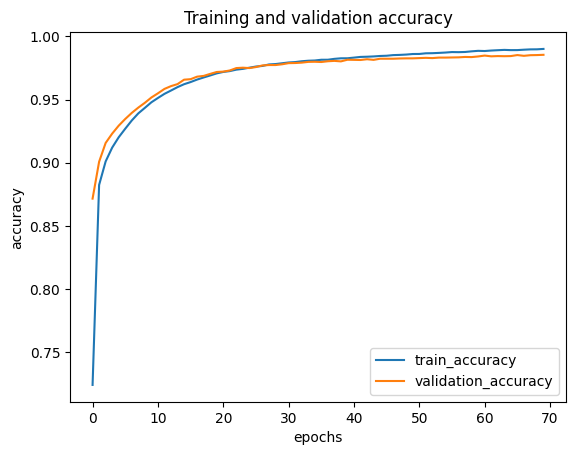

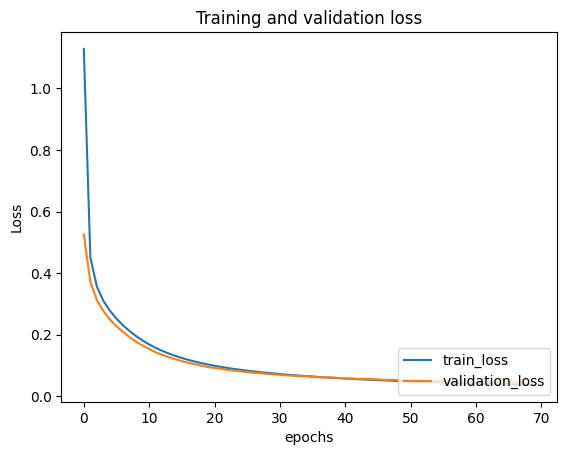

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
loss = history.history['loss']

epochs = range(len(acc))

#plot training and val accuracy per epoch
plt.plot(epochs,acc,label = "train_accuracy")
plt.plot(epochs,val_acc,label = "validation_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(loc = "lower right")
plt.title("Training and validation accuracy")
plt.figure()

#plot training and val loss per epoch
plt.plot(epochs,loss,label = "train_loss")
plt.plot(epochs,val_loss,label = "validation_loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(loc = "lower right")
plt.title("Training and validation loss")
plt.figure()

In [13]:
# show the accuracy on the testing set
print("[INFO] Evaluating...")
(loss,accuracy)= model.evaluate(testData, testLabels, batch_size = batch_size, verbose=1)
print("[INFO] Accuracy: {:.2f}%".format(accuracy*100))

[INFO] Evaluating...
79/79 [==============================] - 2s 21ms/step - loss: 0.0441 - accuracy: 0.9854
[INFO] Accuracy: 98.54%


In [16]:
import os

# Create the directory if it doesn't exist
if not os.path.exists("weights"):
    os.makedirs("weights")

model.save_weights("weights/LeNetMNIST.temp.hdf5", overwrite = True)
model.save_weights("weights/LeNetMNIST.temp.hdf5", overwrite = True)

## Evaluate pre trained model

In [17]:
# init model and load the model weights
print("[INFO] compiling model")
model = LeNet.init(numChannels=image_channels,
                  imgRows = image_height,
                  imgCols = image_width,
                  numClasses = num_classes,
                  weightsPath = "weights/LeNetMNIST.temp.hdf5")

# compile the model
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01),
             loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])

[INFO] compiling model


In [18]:
# show the accuracy on the testing set
print("[INFO] Evaluating...")
(loss,accuracy)= model.evaluate(testData, testLabels, batch_size = 128, verbose=1)
print("[INFO] Accuracy: {:.2f}%".format(accuracy*100))

[INFO] Evaluating...
79/79 [==============================] - 2s 21ms/step - loss: 0.0441 - accuracy: 0.9854
[INFO] Accuracy: 98.54%


## Model predictions

1/1 [==============================] - 0s 24ms/step


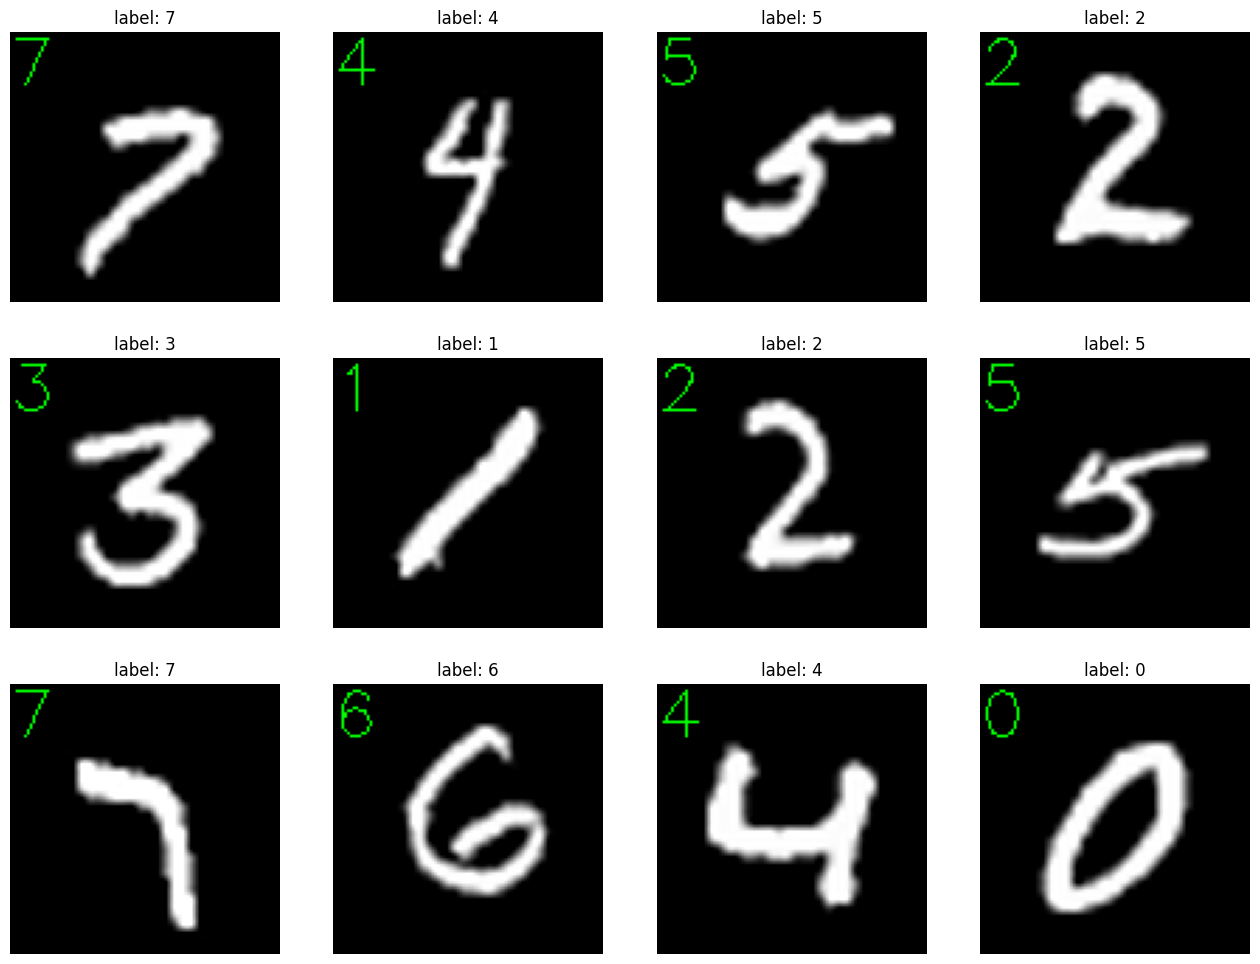

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#set up matplotlb fig, and size it to fit 3x4 pics
nrows = 3
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)

# randomly select a few testing digits
num_predictions = 12
test_indices = np.random.choice(np.arange(0,len(testLabels)), size = (num_predictions,))
test_images = np.stack(([testData[i] for i in test_indices]))
test_labels = np.stack(([testLabels[i] for i in test_indices]))

# Compute predictions
predictions = model.predict(test_images)

for i in range(num_predictions):
    # select the most probable class
    prediction = np.argmax(predictions[i])

    # rescale the test image
    image = (test_images[i]*255).astype('uint8')

    # resize the  test image to see it better

    image = cv2.resize(image,(96,96), interpolation=cv2.INTER_CUBIC)

    # Convert grayscale to rgb color

    image = cv2.merge([image]*3)

    # Select prediction text color
    if prediction == test_labels[i]:
        rgb_color = (0,255,0)
    else:
        rgb_color = (255,0,0)

    # Show the image and prediction
    cv2.putText(image, str(prediction), (0,18), cv2.FONT_HERSHEY_SIMPLEX,0.75, rgb_color,1)

    # set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows,ncols,i+1,title="label: %s" % test_labels[i])
    sp.axis('Off')
    plt.imshow(image)

plt.show()

In [ ]:
!pip install opencv-python



     ---------------------------------------- 38.6/38.6 MB 3.5 MB/s eta 0:00:00
